# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

(150, 2) (150,)


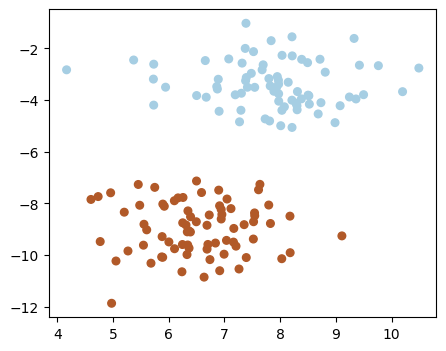

In [5]:
# we create 40 separable points
X, y = make_blobs(n_samples = 150 , centers = 2 , random_state = 6)
print(X.shape, y.shape)

_,ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0] , X[:,1] , c=y , s=30, cmap=plt.cm.Paired)

In [6]:
clf = SVC(kernel = "linear" , random_state = 2)

clf.fit(X,y)

SVC(kernel='linear', random_state=2)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from drive.MyDrive.Machine_Learning.Funciones.decision_grid import fronteras_decision

In [9]:
predictions, h_grid, v_grid = fronteras_decision(X,clf)

print (predictions.shape, h_grid.shape, v_grid.shape)

(1185, 733) (1185, 733) (1185, 733)


[]

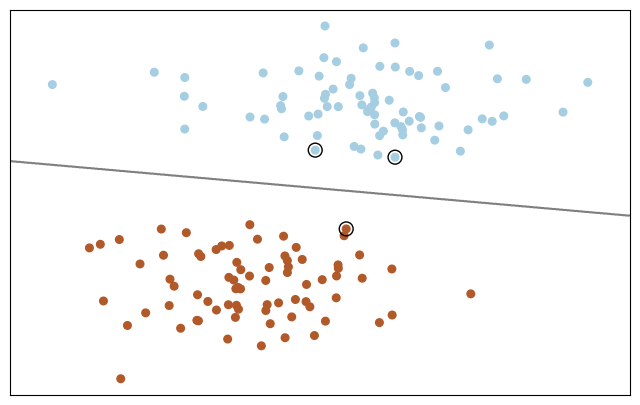

In [14]:
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( X[:, 0] , X[:, 1] , c = y , s = 30, cmap = plt.cm.Paired)

# plot decision boundary and margins
ax.contour( h_grid , v_grid , predictions , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
# ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

## In real data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

(150, 2) (150,) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


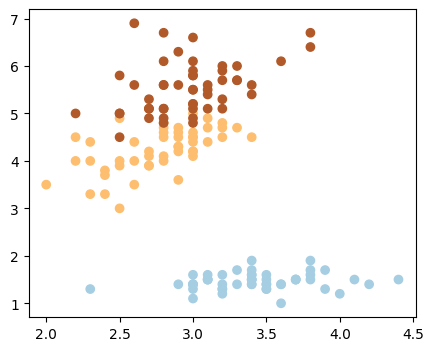

In [16]:
# import some data to play with
iris = load_iris()
X = iris.data[:, 1:3]   # Pick 2 features
Y = iris.target
feature_names = iris.feature_names

print(X.shape, Y.shape, feature_names)

_,ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c =Y, cmap= "Paired")

In [17]:
# Create an instance of SVM and fit the data.
clf = SVC(kernel = "linear", random_state=2)
clf.fit( X , Y )

SVC(kernel='linear', random_state=2)

In [19]:
# Plot decision boundaries
pred_grid, h_grid, v_grid = fronteras_decision(X, clf, 0.1)
print(pred_grid.shape, h_grid.shape, v_grid.shape)

(610, 260) (610, 260) (610, 260)


Text(0, 0.5, 'petal length (cm)')

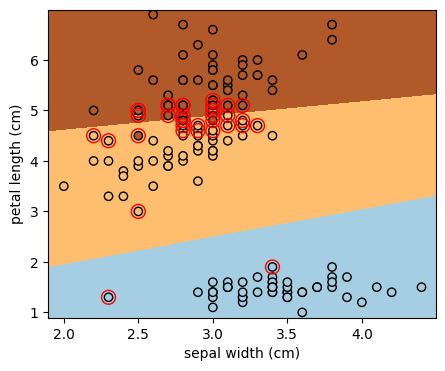

In [20]:
_, ax = plt.subplots(figsize=(5,4))

ax.pcolormesh(h_grid, v_grid, pred_grid , cmap = "Paired")
ax.scatter(X[:,0], X[:,1], c = Y, edgecolors = "k", cmap="Paired")
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], facecolors= "none", s=100, edgecolors="r")
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[2])